# Get score on new pipeline

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dyslexia import preprocessing
from dyslexia.io import load_image
from dyslexia.ocr import extract_text_from_image
from dyslexia.plots import plot_image, plot_n_images

import time
import gc

import cv2
import numpy as np
import matplotlib.pyplot as plt
import jiwer
import pandas as pd
import pickle

In [3]:
%env TESSDATA_PREFIX /usr/share/tesseract-ocr/4.00/tessdata/

env: TESSDATA_PREFIX=/usr/share/tesseract-ocr/4.00/tessdata/


## Get files


In [4]:
from utils import load_all_files_path

subdir_paths, all_files = load_all_files_path()

## Create preprocess function

This is a working section so it will changes while working on this notebook

In [5]:
def preprocess_image(image):    
    image_no_shadow = preprocessing.remove_shadow(image)
    
    image_gray = preprocessing.image_to_gray(image_no_shadow, threshold=True)

    angle = preprocessing.find_best_rotation_angle(image_gray)

    image_fixed = preprocessing.rotate_img(image_gray, angle=angle)
    
    return image_fixed

In [6]:
def get_scores_from_files(files, truth_path):
    compare_df = list()    

    with open(truth_path, 'r') as f:
        truth = f.read()

    for file in files:
        print(file)
        img = load_image(file)
        img = preprocess_image(img)
        
        res0 = extract_text_from_image(img)
        score0 = dict(jiwer.compute_measures(truth=truth, hypothesis=res0))
        
        res180 = extract_text_from_image(preprocessing.rotate_img(img, angle=180))
        score180 = dict(jiwer.compute_measures(truth=truth, hypothesis=res180))

        score_idx = np.argmax([score0['hits'], score180['hits']])
        score = [score0, score180][score_idx]
        
        print([res0, res180][score_idx])
        
        score = pd.Series(score).to_frame().T
        score.index = [file]
        display(score)

        compare_df.append(score)
        gc.collect()
        
    compare_df = pd.concat(compare_df)
    
    return compare_df

## Score "Dictée" files

In [25]:
dictee_files = [f for f in all_files if 'Dictee' in f]

In [26]:
dictee_truth_path = '../Exemples/truth/dictee.txt'

compare_df = get_scores_from_files(dictee_files, dictee_truth_path)

../Exemples/Dictee/IMG_20210329_122324.jpg


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.108108,0.104712,0.172464,0.827536,171.0,14.0,0.0,6.0


../Exemples/Dictee/IMG_20210329_122825.jpg


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122825.jpg,1.0,1.0,1.0,0.0,0.0,0.0,185.0,0.0


../Exemples/Dictee/IMG_20210329_122839.jpg


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122839.jpg,0.054054,0.053191,0.089017,0.910983,178.0,7.0,0.0,3.0


../Exemples/Dictee/IMG_20210329_122828.jpg


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122828.jpg,0.064865,0.064865,0.125522,0.874478,173.0,12.0,0.0,0.0


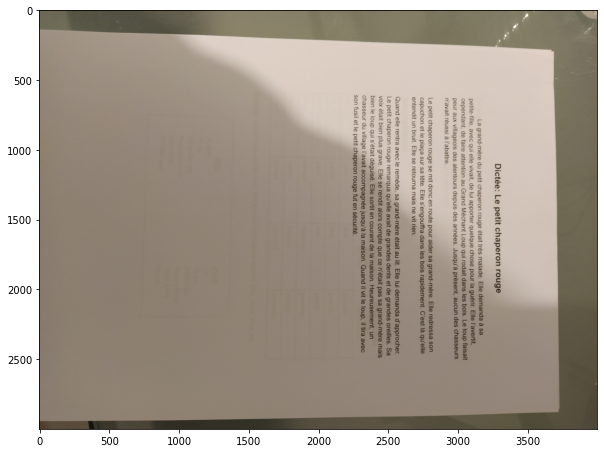

In [10]:
p = '../Exemples/Dictee/IMG_20210329_122839.jpg'
im = load_image(p)
plot_image(im)

In [28]:
compare_df

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.108108,0.104712,0.172464,0.827536,171.0,14.0,0.0,6.0
../Exemples/Dictee/IMG_20210329_122825.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Dictee/IMG_20210329_122839.jpg,0.054054,0.053191,0.089017,0.910983,178.0,7.0,0.0,3.0
../Exemples/Dictee/IMG_20210329_122828.jpg,0.064865,0.064865,0.125522,0.874478,173.0,12.0,0.0,0.0


Score without preprocessing

In [31]:
fpath_dictee_score = '../Exemples/scores/score_dictee.pkl'

with open(fpath_dictee_score, 'rb') as f:
    compare_df_orig = pickle.load(f)
    
compare_df_orig

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.059459,0.059459,0.115383,0.884617,174.0,11.0,0.0,0.0
../Exemples/Dictee/IMG_20210329_122825.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Dictee/IMG_20210329_122839.jpg,0.540541,0.537634,0.622845,0.377155,86.0,19.0,80.0,1.0
../Exemples/Dictee/IMG_20210329_122828.jpg,0.951351,0.951351,0.981757,0.018243,9.0,15.0,161.0,0.0


## Score "Hist geo" files

In [7]:
hist_geo_files = [f for f in all_files if 'Histoire_Geo' in f]

hist_geo_truth_path = '../Exemples/truth/hist_geo.txt'
fpath_hist_geo_score = '../Exemples/scores/score_hist_geo.pkl'

In [10]:
with open(hist_geo_truth_path, 'r') as f:
    truth_geo = f.read()
    
print(truth_geo)

La Grèce Antique

I. Le théâtre grec

Les pièces de théâtre grecque étaient très appréciées dans l'Antiquité. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaients les représentations, avaient une
forme particulière en demi-cercle: ce sont les amphithéâtres.

Gradins

Scène
Organisation d'un amphithéâtre


II. La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.


In [39]:
compare_df = get_scores_from_files(hist_geo_files, dictee_truth_path)

../Exemples/Histoire_Geo/IMG_20210329_122543.jpg
La Grèce Antique

| Lethéâtre grec

Les pièce 63
S de the £ : «
Grecs des Temps AnCiensa;re grççQue étalent très appréciées dans l’Antiquité. L
épopées des héros. Les th ÊDœc:a1ent tout particulièrement les tragédies et le récit.deesS
. Les théâtres, où se déroulaient les représentations, avaient une
y

forme iculii i
particulière en demi-cercle: ce sont les amphithéâtres

(© é loilel

 

Organisation d'un amphithéâtre

 

. — La société grecque

démocratie. Chacun est citoyen à partir de sa majorité et

Les grecs ont AN UNIGRE
PR E oouuRe RU la cité.

peut faire valoir son opinion sur l



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.945946,0.945946,0.994125,0.005875,10.0,82.0,93.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_123005.jpg
Ux

La Grèce Antique

=R daltojaa-Relg e

Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une

forme particulière en demi-cercle: ce sont les amphithéâtres.

 

Organisation d'un amphithéâtre

La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et

peut faire valoir son opinion sur la façon de diriger la cité.



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.940541,0.940541,0.992024,0.007976,11.0,71.0,103.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122940.jpg
 



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.0,1.0,1.0,0.0,0.0,0.0,185.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_123000.jpg
La Grèce Antique

| — Le théâtre grec

4 ° « ‘ « # , * . ‘
Les pièces de théâtre grecque étaient très appréciées dans | Antxqu1tç. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une

forme particulière en demi-cercle: ce sont les amphithéâtres.

Gradins

r————————.—-—….____î
j -

Ï KS

|

 

;
}

Organisation d’un amphithéâtre

H, — La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.

rr cm e rs ETE

mmeatiène vc



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.945946,0.945946,0.994995,0.005005,10.0,98.0,77.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122932.jpg
RE E SORN

p E P S S E A A E E E

crr rn en t É cec m mn

La Grèce Antique

| Le théâtre grec

Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une

forme particulière en demi-cercle: ce sont les amphithéâtres.

—-—
[_____________J Organisation d'un amphithéâtre

. — La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.

E



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.951351,0.951351,0.995908,0.004092,9.0,98.0,78.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122524.jpg
‘ Gr. ce Antique

- étaient très appréciées dans l’Antiquité. Les
.nt tout particulièrement les tragédies et le récit des
$ » « théâtres, où se déroulaient les représentations, avaient une

--» «a demi-cercle: ce sont les amphithéäeres.

Organisation d'un amphithéâtre

l. — Lasociété grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.951351,0.951351,0.993655,0.006345,9.0,60.0,116.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122536.jpg
La Grèce Antique

R del-loldg-Ke)g- e

Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une

forme particulière en demi-cercle: ce sont les amphithéâtres.

Gradins

 

—— _
|
{

 

| “ Organisation d’un amphithéâtre

Hl. — La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.

r p> r e



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.945946,0.945946,0.99406,0.00594,10.0,81.0,94.0,0.0


In [40]:
compare_df

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.945946,0.945946,0.994125,0.005875,10.0,82.0,93.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.940541,0.940541,0.992024,0.007976,11.0,71.0,103.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.945946,0.945946,0.994995,0.005005,10.0,98.0,77.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.951351,0.951351,0.995908,0.004092,9.0,98.0,78.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.951351,0.951351,0.993655,0.006345,9.0,60.0,116.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.945946,0.945946,0.994060,0.005940,10.0,81.0,94.0,0.0


In [37]:
with open(fpath_hist_geo_score, 'rb') as f:
    compare_df_orig = pickle.load(f)
    
compare_df_orig

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.536585,0.530120,0.596766,0.403234,39.0,6.0,37.0,1.0
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.402439,0.397590,0.491870,0.508130,50.0,9.0,23.0,1.0
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,82.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.304878,0.260417,0.352888,0.647112,71.0,10.0,1.0,14.0
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.158537,0.151163,0.235438,0.764562,73.0,8.0,1.0,4.0
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.365854,0.357143,0.538169,0.461831,54.0,21.0,7.0,2.0
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.390244,0.344086,0.478413,0.521587,61.0,15.0,6.0,11.0
